In [2]:
!pip install -U layoutparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2' 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-amearubq/detectron2_53ba82063c00432d8fc00ba55d3cd627
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-amearubq/detectron2_53ba82063c00432d8fc00ba55d3cd627
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done


In [4]:
!pip install layoutparser[ocr]     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!git clone https://github.com/Layout-Parser/layout-parser.git

fatal: destination path 'layout-parser' already exists and is not an empty directory.


In [6]:
%cd layout-parser/

/content/layout-parser


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install pdf2image

In [ ]:
!apt-get install poppler-utils 

In [ ]:
!pip install pdf2jpg

In [ ]:
from pdf2jpg import pdf2jpg
inputpath = r"/content/layout-parser/examples/data/table.pdf"
outputpath = r""
result = pdf2jpg.convert_pdf2jpg(inputpath,outputpath, pages="ALL")
result

In [54]:


from pdf2image import convert_from_path
image = convert_from_path('/content/layout-parser/table_pdf_dir/0_table.jpg')
print(image)
#image = image[..., ::-1] 

PDFPageCountError: ignored

In [ ]:
from pdf2jpg import pdf2jpg
inputpath = r"my_pdf_file.pdf"
outputpath = r""
result = pdf2jpg.convert_pdf2jpg(inputpath,outputpath, pages="ALL")

In [ ]:

from PIL import Image
img = Image.open("/content/layout-parser/table_pdf_dir/0_table.jpg")
img.show()
display(img)

In [ ]:
import cv2
image = cv2.imread("/content/layout-parser/table_pdf_dir/0_table.jpg")
print(image.shape)
image = image[..., ::-1] 

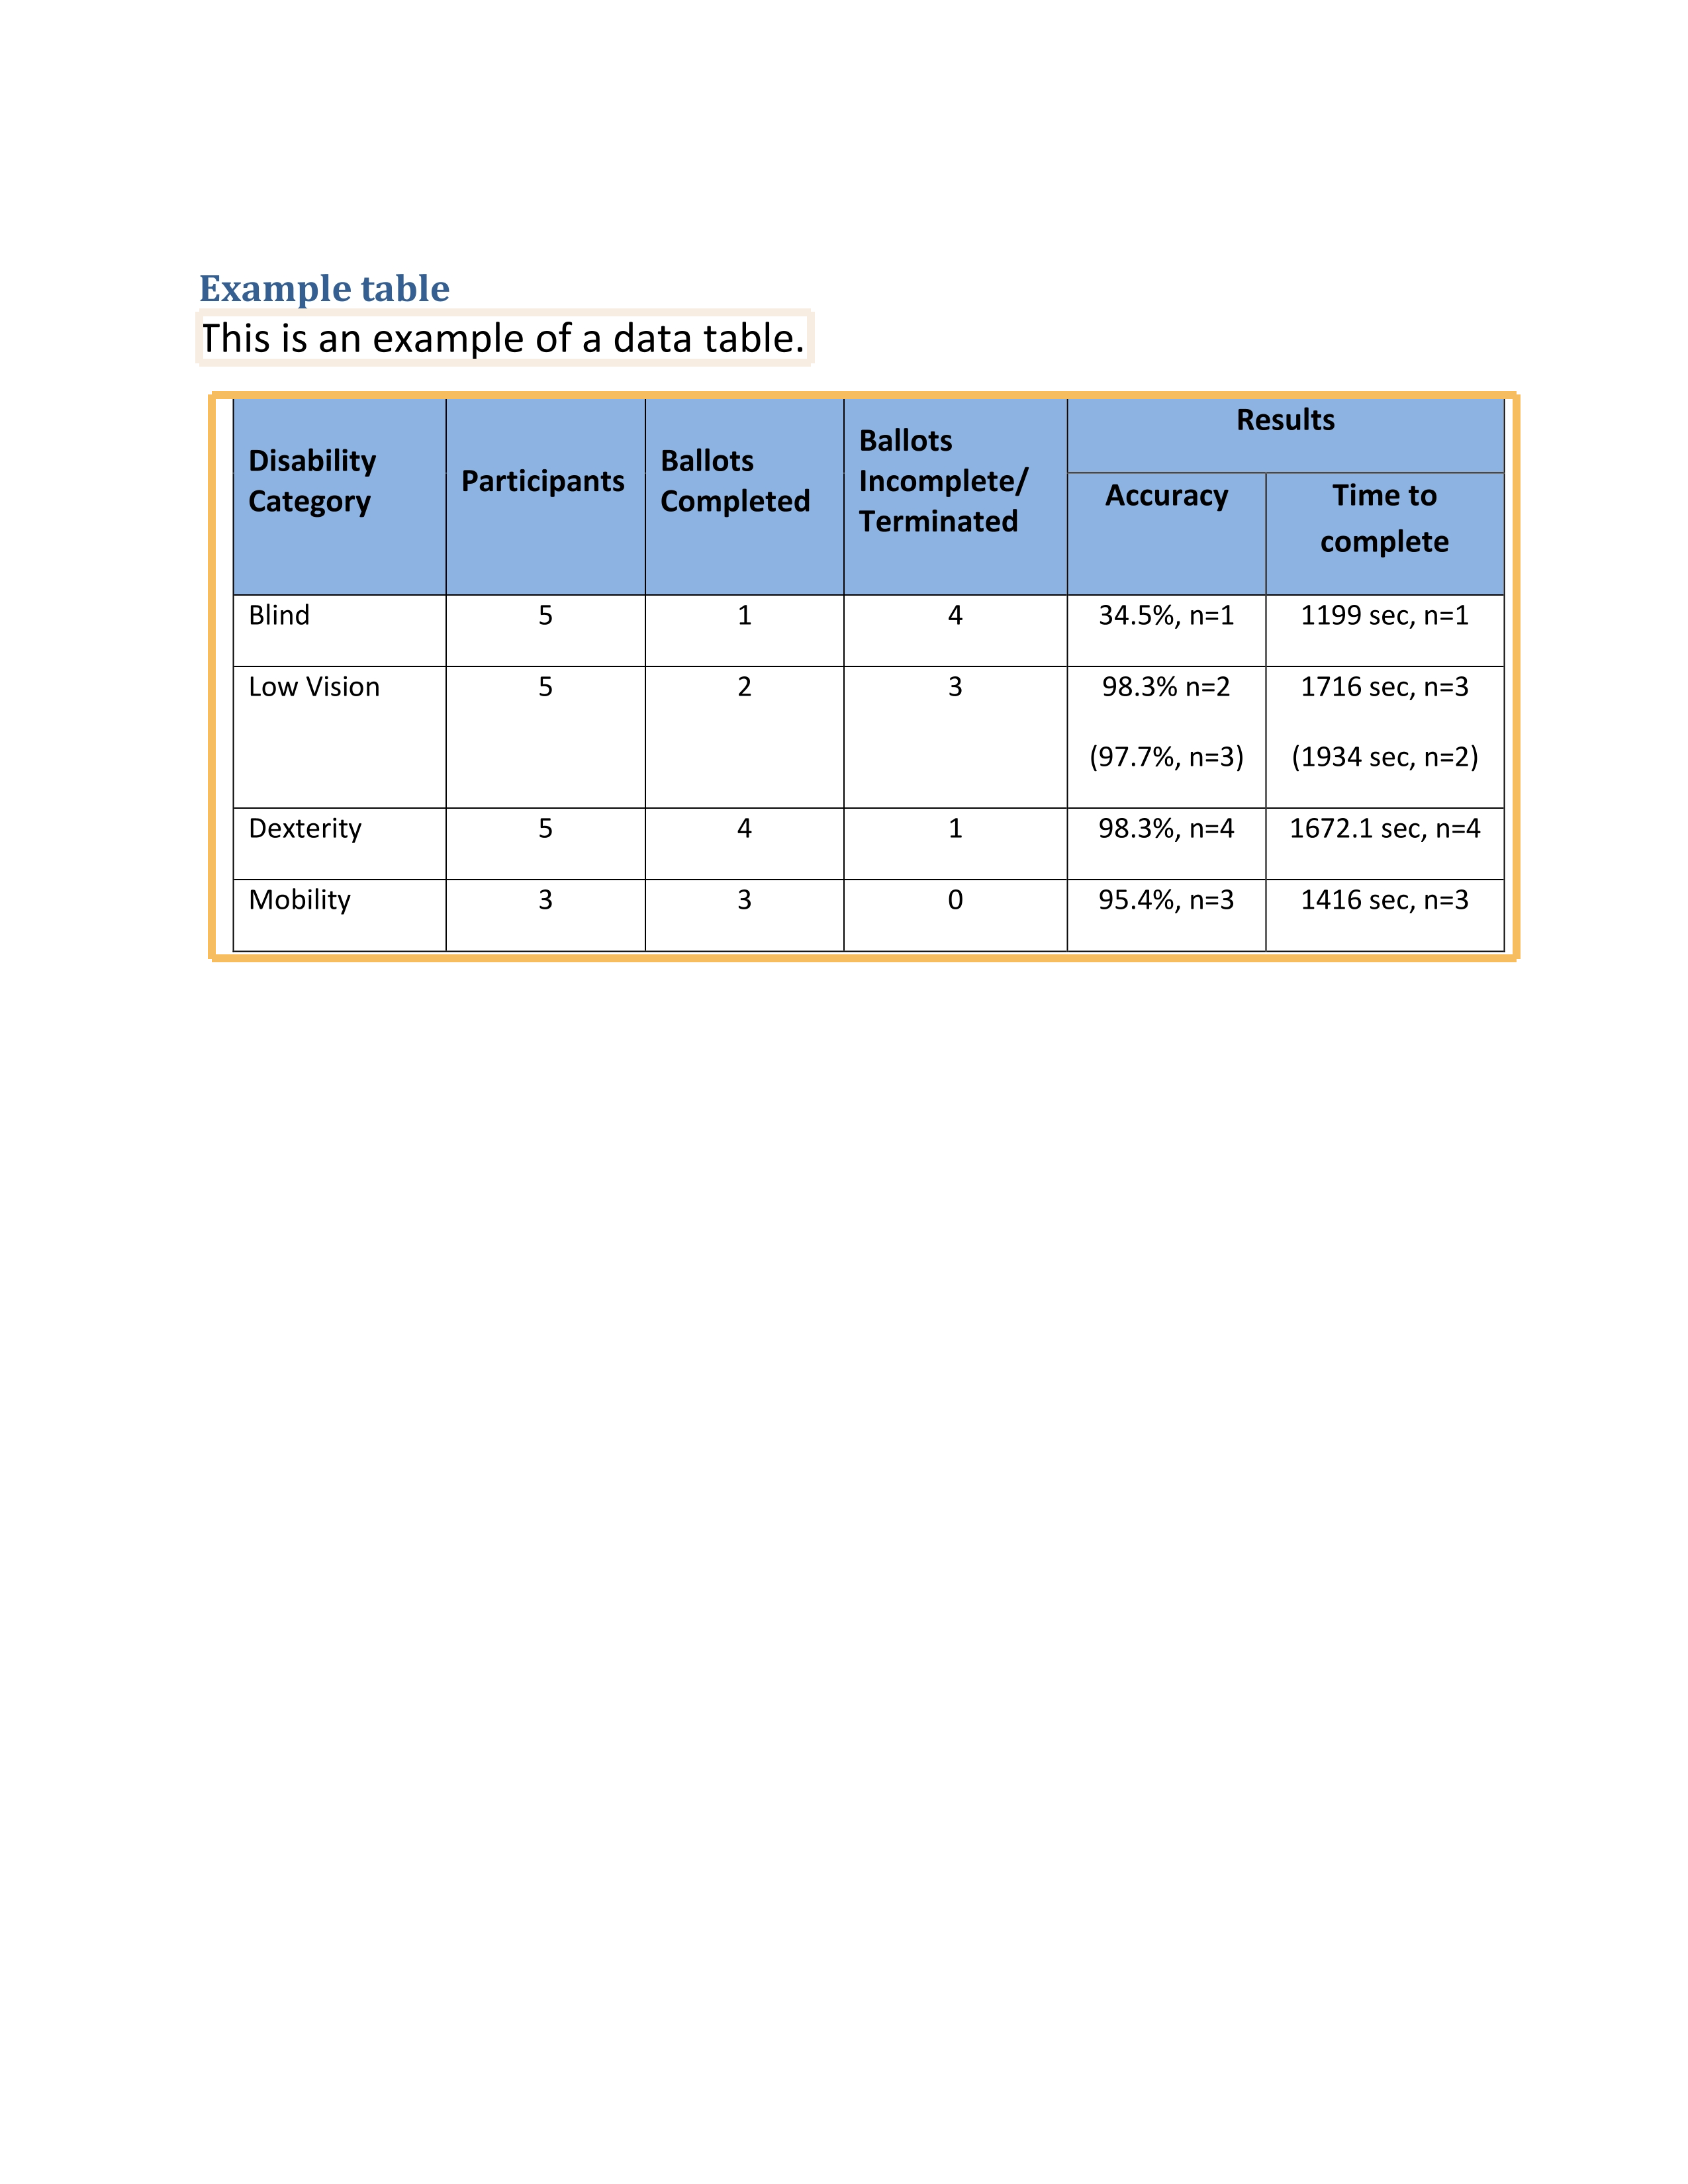

In [67]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.30],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)

In [9]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"
# !pip install effdet

In [60]:
text_blocks = lp.Layout([b for b in layout if b.type=="Text"])
text_blocks

Layout(_blocks=[], page_data={})

In [61]:
title_blocks = lp.Layout([b for b in layout if b.type=='Title'])
list_blocks = lp.Layout([b for b in layout if b.type=='List'])
table_blocks = lp.Layout([b for b in layout if b.type=='Table'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [62]:
valdation_block=title_blocks;
valdation_block

Layout(_blocks=[TextBlock(block=Rectangle(x_1=301.35858154296875, y_1=471.1390686035156, x_2=1224.13427734375, y_2=548.8877563476562), text=None, id=None, type=Title, parent=None, next=None, score=0.6857919096946716)], page_data={})

In [63]:
filter_expresion = lp.Layout([b for b in valdation_block ])

In [64]:

filter_expresion = lp.Layout([b for b in valdation_block \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [65]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = filter_expresion.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in filter_expresion if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
test_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

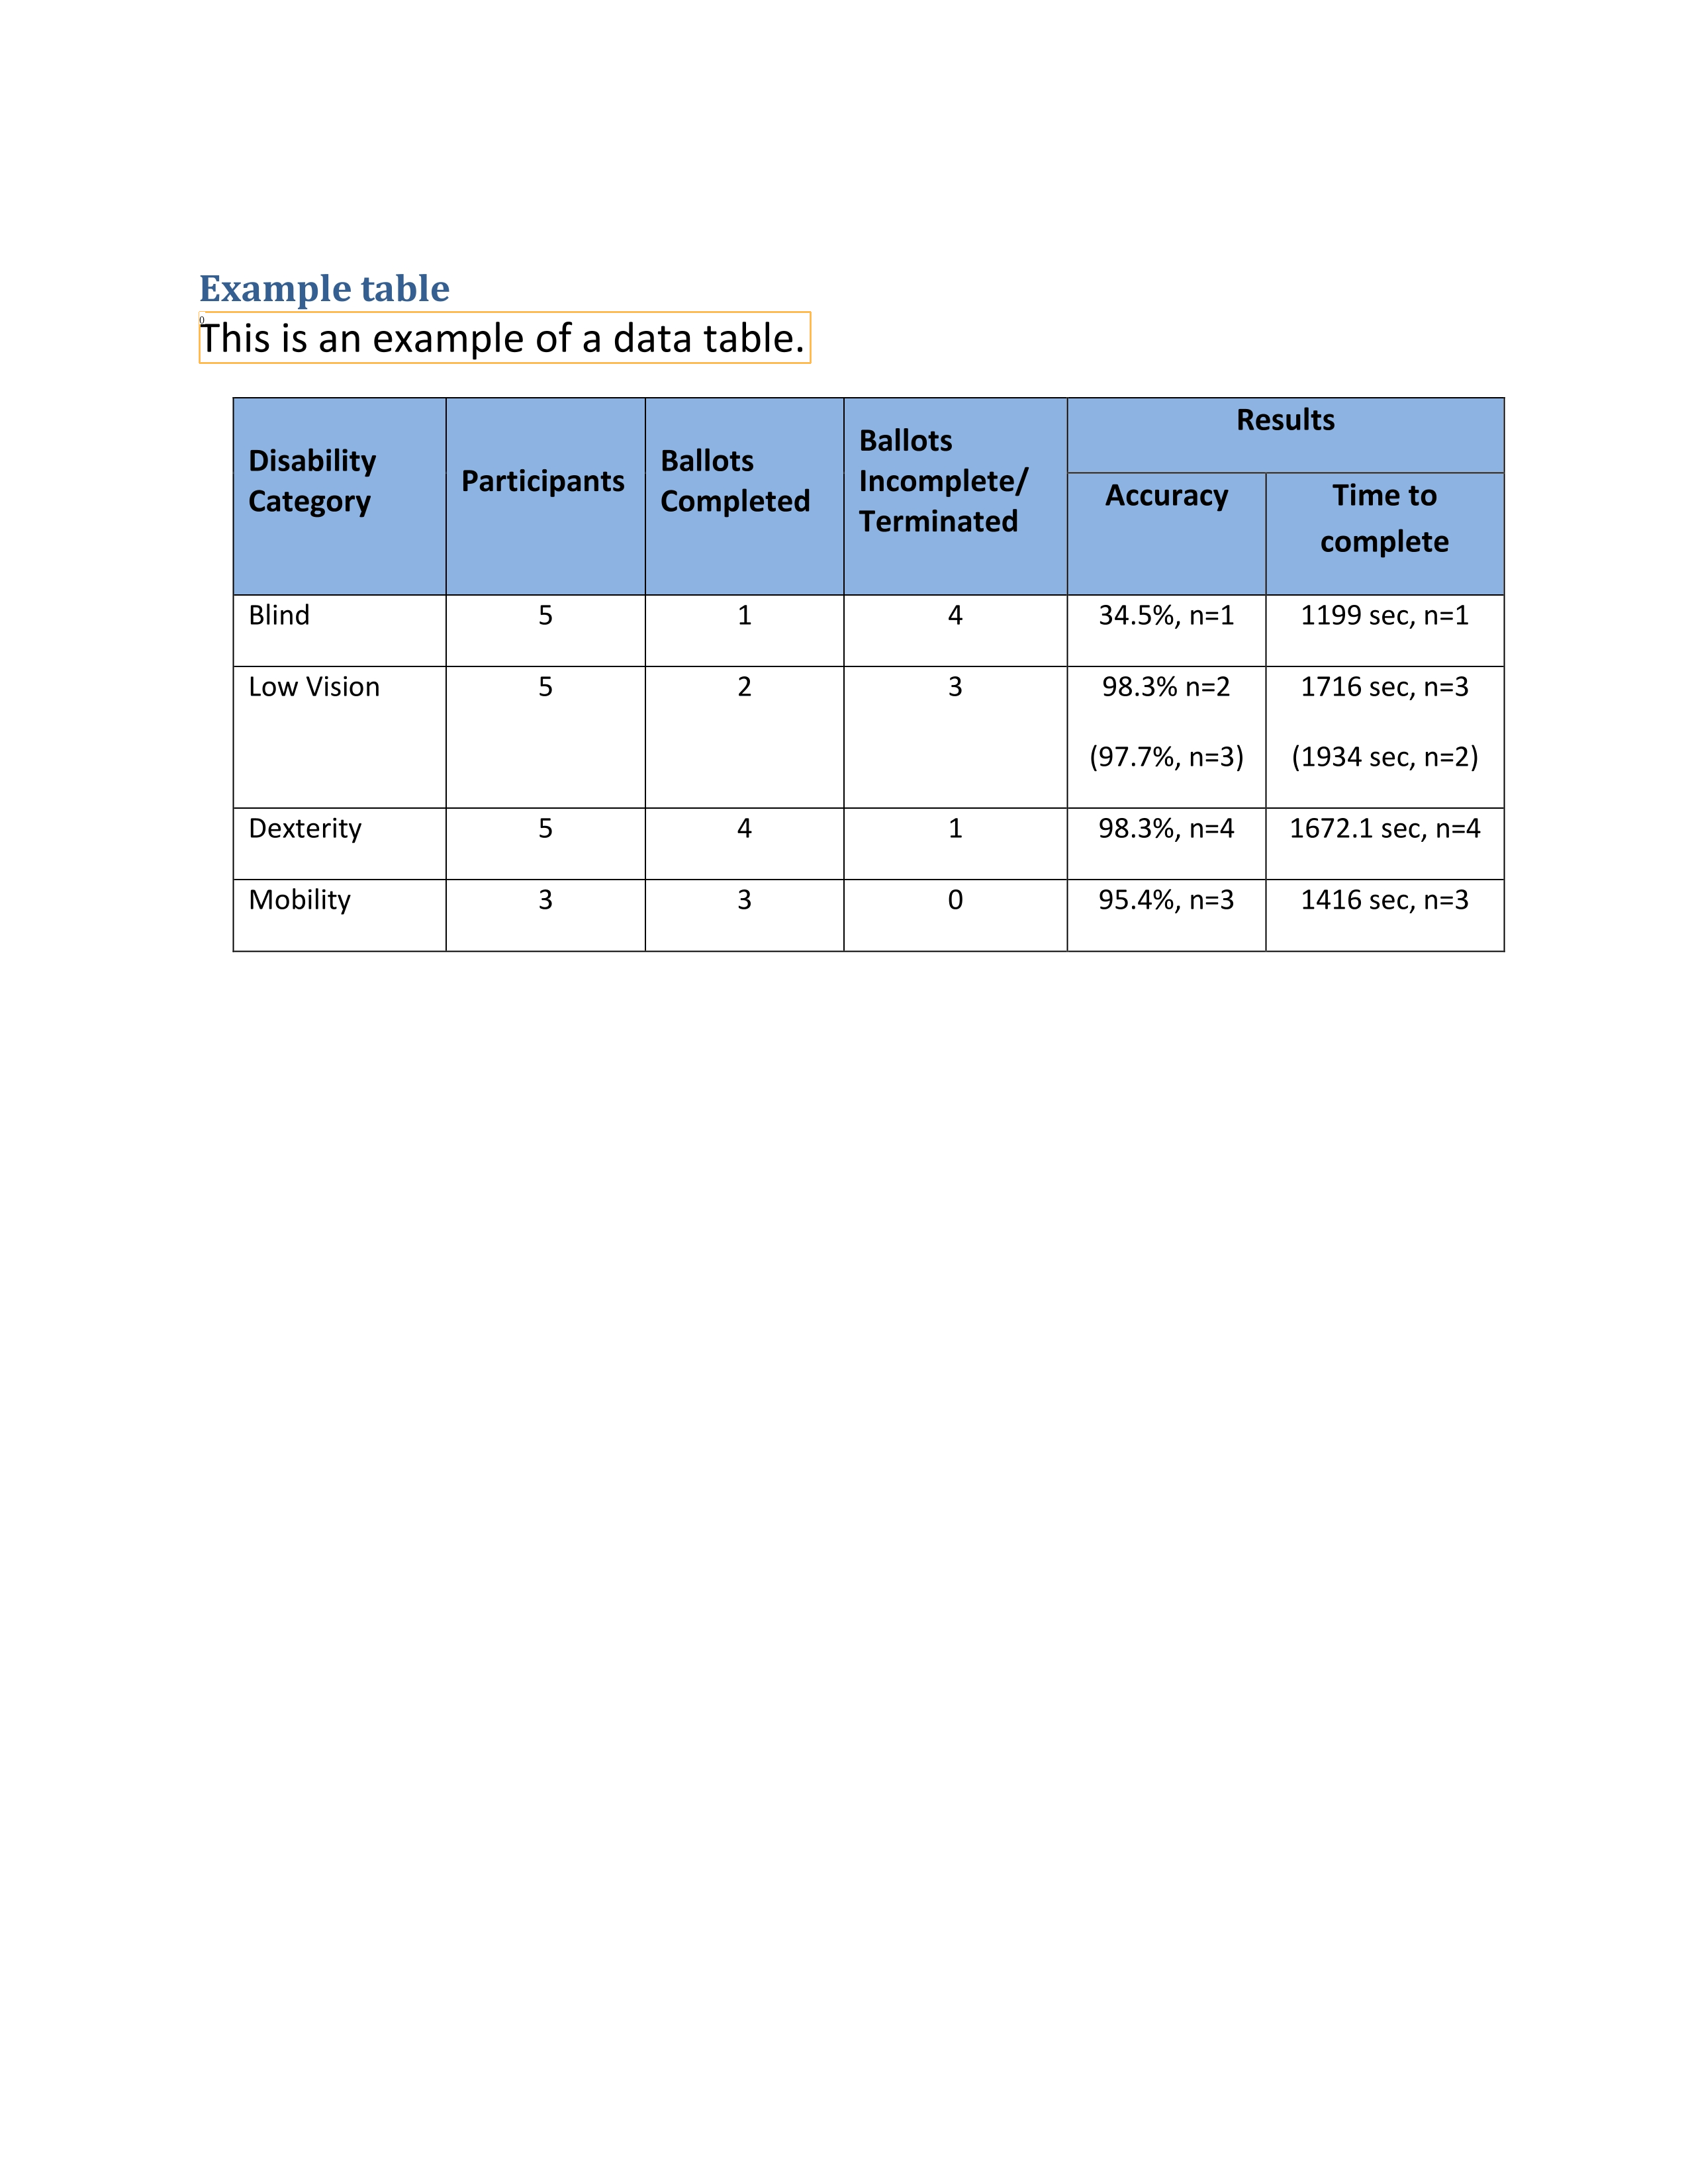

In [66]:

lp.draw_box(image, test_blocks,
            box_width=3, 
            show_element_id=True)

In [18]:
ocr_agent = lp.TesseractAgent(languages='eng') 
    # Initialize the tesseract ocr engine. You might need 
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]

In [19]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [20]:
for block in test_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [21]:
for txt in test_blocks.get_texts():
    print(txt, end='\n---\n')

STATEMENT OF ACCOUNT

---
